In [2]:
# import libraries and function
import numpy as np
import pandas as pd
def genPiAppxDigits(numdigits,appxAcc):
    import numpy as np
    from decimal import getcontext, Decimal
    getcontext().prec = numdigits
    mypi = (Decimal(4) * sum(-Decimal(k%4 - 2) / k for k in range(1, 2*appxAcc+1, 2)))
    return mypi
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
# define constants
numdigits = 1000
appxAcc = 100000
n_vals = [n for n in range(1, numdigits)]
n_vals

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [4]:
# parse digits of pi into a list for training
pi_nums = genPiAppxDigits(numdigits, appxAcc)
pi_digits = [ int(digit) for digit in [*str(pi_nums).split('.')[1]] ]
pi_digits

[1,
 4,
 1,
 5,
 8,
 2,
 6,
 5,
 3,
 5,
 8,
 9,
 7,
 9,
 3,
 4,
 8,
 8,
 4,
 6,
 2,
 6,
 4,
 3,
 3,
 5,
 2,
 0,
 2,
 9,
 5,
 0,
 2,
 8,
 9,
 3,
 7,
 2,
 8,
 4,
 1,
 9,
 3,
 9,
 3,
 9,
 6,
 4,
 9,
 4,
 9,
 5,
 7,
 5,
 9,
 0,
 8,
 6,
 3,
 5,
 9,
 9,
 1,
 9,
 5,
 9,
 2,
 6,
 9,
 0,
 5,
 5,
 1,
 7,
 2,
 9,
 8,
 7,
 5,
 9,
 4,
 5,
 2,
 7,
 2,
 1,
 6,
 8,
 2,
 4,
 7,
 3,
 4,
 8,
 0,
 4,
 5,
 2,
 9,
 1,
 3,
 7,
 8,
 6,
 1,
 6,
 4,
 1,
 0,
 8,
 3,
 3,
 3,
 7,
 4,
 4,
 0,
 3,
 3,
 6,
 7,
 2,
 3,
 0,
 5,
 3,
 4,
 8,
 7,
 2,
 5,
 9,
 8,
 9,
 0,
 9,
 9,
 2,
 0,
 8,
 8,
 7,
 4,
 7,
 2,
 2,
 9,
 2,
 9,
 9,
 0,
 4,
 7,
 3,
 9,
 9,
 8,
 4,
 6,
 1,
 3,
 4,
 6,
 2,
 9,
 0,
 4,
 4,
 4,
 1,
 3,
 5,
 4,
 3,
 1,
 3,
 9,
 4,
 1,
 6,
 2,
 8,
 6,
 8,
 2,
 6,
 9,
 5,
 9,
 0,
 2,
 1,
 1,
 6,
 6,
 8,
 8,
 9,
 8,
 8,
 9,
 5,
 2,
 1,
 8,
 7,
 2,
 0,
 8,
 6,
 5,
 4,
 3,
 1,
 0,
 6,
 4,
 2,
 3,
 1,
 7,
 4,
 0,
 8,
 8,
 2,
 0,
 8,
 0,
 7,
 3,
 2,
 7,
 3,
 5,
 2,
 8,
 1,
 7,
 9,
 6,
 5,
 3,
 1,
 5,
 4,
 8,
 6,
 7,
 1,


In [5]:
# Parse digits and N values into a dataframe to create a labelled dataset for training
df_digits = pd.DataFrame(list(zip(n_vals, pi_digits)), columns=['N', 'PI Digit'])
df_digits

,N,PI Digit
0,1,1
1,2,4
2,3,1
3,4,5
4,5,8
...,...,...
994,995,9
995,996,8
996,997,2
997,998,3


Text(0, 0.5, 'Digit Value')

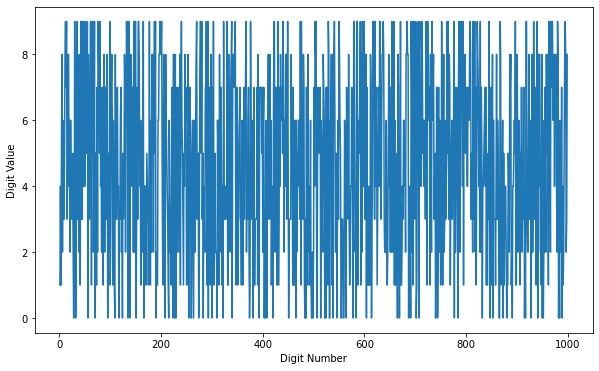

In [6]:
# Plot the digits of PI vs. "Time"(N-value) to visualize the "time-series"
plt.figure(figsize=(10,6))
plt.plot(df_digits['N'], df_digits['PI Digit'])
plt.xlabel('Digit Number')
plt.ylabel('Digit Value')

In [13]:
# Check for stationarity in the time-series. This can be done using adfuller class. The p-value of the resulting
# class instance indicates the stationarity of the series(i.e. whether the variation of time is statistically)
# significant. If the p-value is >0.05, then it can be said that stationarity does not exist in the time-series
stationarity_test = adfuller(df_digits['PI Digit'], autolag='AIC')
print("P-value:", stationarity_test[1])

P-value: 9.102705463651829e-27


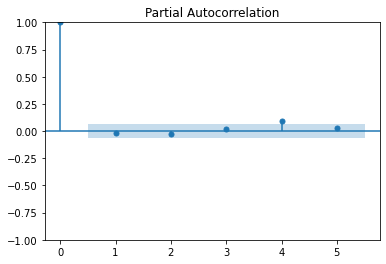

In [8]:
# As can be seen above, the p-value is <0.05, implying that there no stationarity in the dataset. For predicting
# the next 50 digits of PI, we will use an Autoregressive time-series model. To determine the optimal number of
# lags for the model, we can plot a partial autocorrelation plot. This can be done using the plot_pacf function
pacf = plot_pacf(df_digits['PI Digit'], lags=5)

In [9]:
# It is worth noting from the above autocorrelation plot that the partial autocorrelation plot drops off after 0 
# lags, which would imply that this is the optimal number of lags. This, in and of itself, could be considered
# evidence that PI is irrational, since with 0 lags the autoregression equation would simply result in a white 
# noise error term (which would imply that the digits of PI have no disceernable pattern, and could be considered
# as white noise). However, for the sake of the model, we will use 1 lag as the minimum value for the prediction
ar_model = AutoReg(df_digits['PI Digit'], lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               PI Digit   No. Observations:                  999
Model:                     AutoReg(1)   Log Likelihood               -2464.581
Method:               Conditional MLE   S.D. of innovations              2.859
Date:                Mon, 21 Aug 2023   AIC                           4935.163
Time:                        11:06:55   BIC                           4949.880
Sample:                             1   HQIC                          4940.757
                                  999                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7417      0.173     27.468      0.000       4.403       5.080
PI Digit.L1    -0.0192      0.032     -0.608      0.543      -0.081       0.043
                                    Roots       

In [34]:
# Use AR model to predict the next 50 digits of PI
pred_start = len(df_digits['PI Digit'])
pred = ar_model.predict(start=pred_start, end=pred_start+50)
pred

51

In [39]:
# As can be seen above, the predicted value of the digits converges to a single value after many predictions.
# We can now plot this alongside the "actual" digits of PI
next_fifty_n_vals = [n for n in range(numdigits-1, numdigits+50)]
pi_nums_next_fifty = genPiAppxDigits(numdigits+50, appxAcc)
pi_digits_next_fifty = [ int(digit) for digit in [*str(pi_nums_next_fifty).split('.')[1]] ]
pi_digits_next_fifty = pi_digits_next_fifty[-51:]
print("next fifty n vals:", next_fifty_n_vals)
print("-"*40)
print("next fifty pi digits:", pi_digits_next_fifty)
len()

next fifty n vals: [999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049]
----------------------------------------
next fifty pi digits: [6, 9, 6, 8, 1, 7, 3, 5, 3, 0, 9, 7, 3, 6, 7, 9, 2, 9, 8, 8, 5, 4, 6, 4, 1, 4, 7, 4, 7, 6, 0, 2, 0, 2, 1, 0, 7, 8, 6, 8, 9, 3, 6, 1, 6, 9, 9, 9, 3, 3]


51

ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

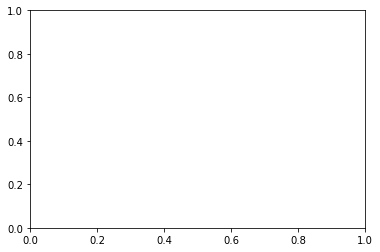

In [32]:
plt.plot(next_fifty_n_vals, pi_digits_next_fifty, label="Actual PI Digit Value")
plt.plot(next_fifty_n_vals, pred, label="Predicted PI Digit Value")
plt.xlabel("N")
plt.ylabel("PI digit")